<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-the-Gene-Table" data-toc-modified-id="Creating-the-Gene-Table-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creating the Gene Table</a></span><ul class="toc-item"><li><span><a href="#Get-information-from-GFF-files" data-toc-modified-id="Get-information-from-GFF-files-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get information from GFF files</a></span></li><li><span><a href="#(Optional)-KEGG-and-COGs" data-toc-modified-id="(Optional)-KEGG-and-COGs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>(Optional) KEGG and COGs</a></span><ul class="toc-item"><li><span><a href="#Generate-nucleotide-fasta-files-for-CDS" data-toc-modified-id="Generate-nucleotide-fasta-files-for-CDS-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Generate nucleotide fasta files for CDS</a></span></li><li><span><a href="#Run-EggNOG-Mapper" data-toc-modified-id="Run-EggNOG-Mapper-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Run EggNOG Mapper</a></span></li><li><span><a href="#Get-KEGG-IDs" data-toc-modified-id="Get-KEGG-IDs-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Get KEGG IDs</a></span></li><li><span><a href="#Save-KEGG-information" data-toc-modified-id="Save-KEGG-information-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Save KEGG information</a></span></li><li><span><a href="#Save-COGs-to-annotation-dataframe" data-toc-modified-id="Save-COGs-to-annotation-dataframe-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Save COGs to annotation dataframe</a></span></li></ul></li><li><span><a href="#Uniprot-ID-mapping" data-toc-modified-id="Uniprot-ID-mapping-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Uniprot ID mapping</a></span></li><li><span><a href="#Add-Biocyc-Operon-information" data-toc-modified-id="Add-Biocyc-Operon-information-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Add Biocyc Operon information</a></span><ul class="toc-item"><li><span><a href="#Assign-unique-IDs-to-operons" data-toc-modified-id="Assign-unique-IDs-to-operons-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Assign unique IDs to operons</a></span></li></ul></li><li><span><a href="#Clean-up-and-save-annotation" data-toc-modified-id="Clean-up-and-save-annotation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Clean up and save annotation</a></span></li><li><span><a href="#Final-statistics" data-toc-modified-id="Final-statistics-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Final statistics</a></span></li><li><span><a href="#Fill-missing-values" data-toc-modified-id="Fill-missing-values-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Fill missing values</a></span></li><li><span><a href="#GO-Annotations" data-toc-modified-id="GO-Annotations-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>GO Annotations</a></span></li></ul></li></ul></div>

# Creating the Gene Table
This notebook is copied from the [Pymodulon GitHub repository](https://github.com/SBRG/pymodulon/blob/master/docs/tutorials/creating_the_gene_table.ipynb)

In [232]:
import os
import sys
sys.path.append('/home/annie/Documents/multi-Ecoli/strains/pymodulon/')
import gene_util
from gene_util import *
import json
import requests

## Get information from GFF files

First, download the FASTA and GFF files for your organism and its plasmids from NCBI.

Enter the location of all your GFF files here:

In [233]:
gff_files = [os.path.join('..','sequence_files','full.gff3')]

The following cell will convert all the GFF files into a single Pandas DataFrame for easy manipulation. Pseudogenes have multiple rows in a GFF file (one for each fragment), but only the first fragment will be kept.

In [234]:
keep_cols = ['accession','start','end','strand','gene_name','old_locus_tag','gene_product','ncbi_protein']

DF_annot = gff2pandas(gff_files,index='locus_tag')
DF_annot = DF_annot[keep_cols]

DF_annot.head()

accession  start   end strand gene_name  \
locus_tag                                                     
Synpcc7942_0001    CP000100.1     65  1237      +      None   
Synpcc7942_B2615   CP000101.1     65   394      -      None   
Synpcc7942_B2626   CP000101.1    497  1321      -      None   
HTX97_RS00010     NC_004990.1    574  1161      -      None   
Synpcc7942_0002    CP000100.1   1262  2134      +      None   

                          old_locus_tag                        gene_product  \
locus_tag                                                                     
Synpcc7942_0001                    None  DNA polymerase III%2C beta subunit   
Synpcc7942_B2615                   None      conserved hypothetical protein   
Synpcc7942_B2626                   None                hypothetical protein   
HTX97_RS00010     pUH24_03%2CST32046_p3                hypothetical protein   
Synpcc7942_0002                    None                hypothetical protein   

                    ncbi_protein  
locus_tag                         
Synpcc7942_0001       ABB56033.1  
Synpcc7942_B2615      ABB58644.1  
Synpcc7942_B2626      ABB58655.1  
HTX97_RS00010     WP_192963997.1  
Synpcc7942_0002       ABB56034.1

To ensure that the gene index used is identical to the expression matrix, load in your data.

In [235]:
log_tpm_file = os.path.join('..','data','all_strict','log_tpm.csv')
DF_log_tpm = pd.read_csv(log_tpm_file,index_col=0)
DF_log_tpm.head()

SRX10864008  SRX10864009  SRX10864010  SRX10864011  \
Geneid                                                              
HTX97_RS00010     4.006863     4.200736     4.074183     3.579183   
HTX97_RS00015    10.093208     9.983432    10.177876     9.653030   
HTX97_RS00020     6.752536     6.836268     7.166657     6.365812   
HTX97_RS00025     3.233251     3.681798     3.633452     2.958353   
HTX97_RS00030     3.866467     3.972240     4.167821     3.599575   

               SRX10864012  SRX10864013  SRX10864014  SRX10864015  \
Geneid                                                              
HTX97_RS00010     3.665755     3.554242     3.136272     3.363055   
HTX97_RS00015     9.667601     9.794827     9.118401     8.969219   
HTX97_RS00020     6.366774     6.630456     5.925780     5.848924   
HTX97_RS00025     3.343749     3.450259     2.406628     2.558450   
HTX97_RS00030     3.795848     3.925327     3.388736     3.433265   

               SRX10864016  SRX15590299  ...  SRX4105564  SRX4105565  \
Geneid                                   ...                           
HTX97_RS00010     3.196107     0.000000  ...    0.000000    1.198134   
HTX97_RS00015     8.968200     0.000000  ...    6.936893    7.064514   
HTX97_RS00020     5.729516     0.000000  ...    4.436618    4.877481   
HTX97_RS00025     2.475491     0.000000  ...    2.508676    3.707089   
HTX97_RS00030     3.220328     0.073472  ...    3.798281    4.010371   

               SRX4105566  SRX4105568  UV_control_2  UV_control_3  \
Geneid                                                              
HTX97_RS00010    0.000000    0.000000      3.426589      2.478253   
HTX97_RS00015    7.231138    6.902760      6.041863      6.193682   
HTX97_RS00020    3.761554    4.591979      3.321411      2.587320   
HTX97_RS00025    4.412021    3.000040      3.754842      2.608173   
HTX97_RS00030    3.903187    3.096987      3.377521      2.760718   

               UV_exposure_2  UV_exposure_3   wt_LL_1   wt_LL_2  
Geneid                                                           
HTX97_RS00010       2.947425       2.130384  4.311324  4.016387  
HTX97_RS00015       5.890799       6.540253  7.415367  7.378473  
HTX97_RS00020       3.288373       3.553206  4.206015  3.929006  
HTX97_RS00025       3.155538       2.437664  4.777672  4.411459  
HTX97_RS00030       2.991548       2.435874  4.194962  3.585021  

[5 rows x 224 columns]

Check that the genes are the same in the expression dataset as in the annotation dataframe. Mismatched genes are listed below.

In [236]:
test = DF_annot.sort_index().index == DF_log_tpm.sort_index().index
DF_annot[~test]

Empty DataFrame
Columns: [accession, start, end, strand, gene_name, old_locus_tag, gene_product, ncbi_protein]
Index: []

## (Optional) KEGG and COGs

### Generate nucleotide fasta files for CDS

Enter the location of all your fasta files here:

In [237]:
fasta_files = [os.path.join('..','sequence_files','genome.fasta')]

The following code generates CDS files using your FASTA and GFF3 files

In [238]:
from Bio import SeqIO

cds_list = []
for fasta in fasta_files:
    seq = SeqIO.read(fasta,'fasta')

    # Get gene information for genes in this fasta file
    df_genes = DF_annot[DF_annot.accession == seq.id]
    
    for i,row in df_genes.iterrows():
        cds = seq[row.start-1:row.end]
        if row.strand == '-':
            cds = seq[row.start-1:row.end].reverse_complement()
        cds.id = row.name
        cds.description = row.gene_name if pd.notnull(row.gene_name) else row.name
        cds_list.append(cds)

In [239]:
cds_list[:5]

[SeqRecord(seq=Seq('ATGCTTTGGCAAGATTGCGATCAAAGGCTCGGGCAGCCTCCCCCCATGAAGTTG...TAG'), id='Synpcc7942_0001', name='CP000100.1', description='Synpcc7942_0001', dbxrefs=[]),
 SeqRecord(seq=Seq('GTGGCAATGTCCGACCAGCCTGAAGAACTGCGGGTTAGCGACCTTCTCAATCGA...TAA'), id='Synpcc7942_0002', name='CP000100.1', description='Synpcc7942_0002', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGACGGCGATCTCCTCTGCTCCTTTTTCGGCCGATGAAATTGCTGGTGAGGGC...TAA'), id='Synpcc7942_0003', name='CP000100.1', description='Synpcc7942_0003', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGATCCCGACTCAGCCGCTGACCGCCGACCTGGATTGCGATTTGGGCCTGGAG...TAA'), id='Synpcc7942_0004', name='CP000100.1', description='Synpcc7942_0004', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCTCAATCGCGATCGCCCTCGCTGGTTTGTCGGGCAAGACTTGGATGGATTC...TAG'), id='Synpcc7942_0005', name='<unknown name>', description='Synpcc7942_0005', dbxrefs=[])]

Save the CDS file

In [240]:
# cds_file = os.path.join('..','data','external','CDS.fna')
# SeqIO.write(cds_list, cds_file, 'fasta')

### Run EggNOG Mapper
1. Go to http://eggnog-mapper.embl.de/.
1. Upload the CDS.fna file from your organism directory (within the sequence_files folder)
1. Make sure to limit the taxonomy to the correct level
1. After the job is submitted, you must follow the link in your email to run the job.
1. Once the job completes (after ~4 hrs), download the annotations file.
1. Save the annotation file

### Get KEGG IDs

Once you have the EggNOG annotations, load the annotation file

In [241]:
eggnog_file = os.path.join('..','data','external','eggNOG_annotations.txt')

In [242]:
DF_eggnog = pd.read_csv(eggnog_file,sep='\t',skiprows=5,header=None)
eggnog_cols = ['query_name','seed eggNOG ortholog','seed ortholog evalue','seed ortholog score',
               'eggNOG OGs','max_annot_lvl','COG','Description','Preferred_name','GOs',
               'EC number','KEGG_ko','KEGG_pathway','KEGG_module','KEGG_reaction','KEGG_rclass',
               'BRITE','KEGG_TC','CAZy','BiGG Reaction','PFAMs']

DF_eggnog.columns = eggnog_cols

# Strip last three rows as they are comments
DF_eggnog = DF_eggnog.iloc[:-3]

# Set locus tag as index
DF_eggnog = DF_eggnog.set_index('query_name')
DF_eggnog.index.name = 'locus_tag'

DF_eggnog.head()

seed eggNOG ortholog  seed ortholog evalue  \
locus_tag                                                     
Synpcc7942_0001  1140.Synpcc7942_0001         1.330000e-273   
Synpcc7942_0002  1140.Synpcc7942_0002         3.540000e-198   
Synpcc7942_0003  1140.Synpcc7942_0003          0.000000e+00   
Synpcc7942_0004  1140.Synpcc7942_0004          0.000000e+00   
Synpcc7942_0005  1140.Synpcc7942_0005          0.000000e+00   

                 seed ortholog score  \
locus_tag                              
Synpcc7942_0001                749.0   
Synpcc7942_0002                550.0   
Synpcc7942_0003               1548.0   
Synpcc7942_0004                977.0   
Synpcc7942_0005               1049.0   

                                                        eggNOG OGs  \
locus_tag                                                            
Synpcc7942_0001  COG0592@1|root,COG0592@2|Bacteria,1FZV5@1117|C...   
Synpcc7942_0002  COG3881@1|root,COG3881@2|Bacteria,1G6D8@1117|C...   
Synpcc7942_0003  COG0046@1|root,COG0046@2|Bacteria,1G228@1117|C...   
Synpcc7942_0004  COG0034@1|root,COG0034@2|Bacteria,1G1C9@1117|C...   
Synpcc7942_0005  COG0659@1|root,COG0659@2|Bacteria,1G1CM@1117|C...   

                      max_annot_lvl COG  \
locus_tag                                 
Synpcc7942_0001  1129|Synechococcus   L   
Synpcc7942_0002  1129|Synechococcus   S   
Synpcc7942_0003  1129|Synechococcus   F   
Synpcc7942_0004  1129|Synechococcus   F   
Synpcc7942_0005  1129|Synechococcus   P   

                                                       Description  \
locus_tag                                                            
Synpcc7942_0001  Confers DNA tethering and processivity to DNA ...   
Synpcc7942_0002                             PFAM PRC-barrel domain   
Synpcc7942_0003  Part of the phosphoribosylformylglycinamidine ...   
Synpcc7942_0004  Catalyzes the formation of phosphoribosylamine...   
Synpcc7942_0005  secondary active sulfate transmembrane transpo...   

                Preferred_name GOs EC number    KEGG_ko  \
locus_tag                                                 
Synpcc7942_0001           dnaN   -   2.7.7.7  ko:K02338   
Synpcc7942_0002              -   -         -          -   
Synpcc7942_0003           purL   -   6.3.5.3  ko:K01952   
Synpcc7942_0004           purF   -  2.4.2.14  ko:K00764   
Synpcc7942_0005              -   -         -  ko:K06901   

                                                      KEGG_pathway  \
locus_tag                                                            
Synpcc7942_0001  ko00230,ko00240,ko01100,ko03030,ko03430,ko0344...   
Synpcc7942_0002                                                  -   
Synpcc7942_0003  ko00230,ko01100,ko01110,ko01130,map00230,map01...   
Synpcc7942_0004  ko00230,ko00250,ko01100,ko01110,ko01130,map002...   
Synpcc7942_0005                                                  -   

                KEGG_module                KEGG_reaction  \
locus_tag                                                  
Synpcc7942_0001      M00260  R00375,R00376,R00377,R00378   
Synpcc7942_0002           -                            -   
Synpcc7942_0003      M00048                       R04463   
Synpcc7942_0004      M00048                       R01072   
Synpcc7942_0005           -                            -   

                             KEGG_rclass  \
locus_tag                                  
Synpcc7942_0001                  RC02795   
Synpcc7942_0002                        -   
Synpcc7942_0003          RC00010,RC01160   
Synpcc7942_0004  RC00010,RC02724,RC02752   
Synpcc7942_0005                        -   

                                                           BRITE   KEGG_TC  \
locus_tag                                                                    
Synpcc7942_0001  ko00000,ko00001,ko00002,ko01000,ko03032,ko03400         -   
Synpcc7942_0002                                                -         -   
Synpcc7942_0003                  ko00000,ko00001,ko00002,ko0100

Now we will pull the KEGG information from the eggNOG file, including orthology, pathway, module, and reactions for each gene.

In [243]:
DF_kegg = DF_eggnog[['KEGG_pathway','KEGG_module','KEGG_reaction']]

# Melt dataframe
DF_kegg = DF_kegg.reset_index().melt(id_vars='locus_tag') 

# Remove null values
DF_kegg = DF_kegg[DF_kegg.value.notnull()]

# Split comma-separated values into their own rows
list2struct = []
for name,row in DF_kegg.iterrows():
    for val in row.value.split(','):
        list2struct.append([row.locus_tag,row.variable,val])

DF_kegg = pd.DataFrame(list2struct,columns=['gene_id','database','kegg_id'])

# Remove ko entries, as only map entries are searchable in KEGG pathway
DF_kegg = DF_kegg[~DF_kegg.kegg_id.str.startswith('ko')]

DF_kegg.head()

gene_id      database   kegg_id
6   Synpcc7942_0001  KEGG_pathway  map00230
7   Synpcc7942_0001  KEGG_pathway  map00240
8   Synpcc7942_0001  KEGG_pathway  map01100
9   Synpcc7942_0001  KEGG_pathway  map03030
10  Synpcc7942_0001  KEGG_pathway  map03430

### Save KEGG information

In [244]:
# DF_kegg.to_csv(os.path.join('..','data','external','kegg_mapping.csv'))

### Save COGs to annotation dataframe

In [245]:
DF_annot['COG'] = DF_eggnog.COG

# Make sure COG only has one entry per gene
DF_annot['COG'] = [item[0] if isinstance(item,str) else item for item in DF_annot['COG']]

## Uniprot ID mapping

The ``uniprot_id_mapping`` function is a python wrapper for the [Uniprot ID mapping tool](https://www.uniprot.org/uploadlists/). Use ``input_id=P_REFSEQ_AC`` if the FASTA/GFF files are from RefSeq, and ``input_id=EMBL`` if the files are from Genbank.

The above method doesn't work. Need time to adapt code to Uniprot's new API. For now, do this: <br>
' '.join(DF_annot.ncbi_protein.fillna('') <br>
Copy and paste this list to : https://www.uniprot.org/id-mapping <br>
Choose mapping from EMBL-GenBank-DDBJ_CDS to UniProtKB <br>
Download the results

In [206]:
# def uniprot_id_mapping(prot_list,input_id='EMBL-GenBank-DDBJ_CDS',output_id='UniProtKB',
#                        input_name='input_id',output_name='output_id'):
#     ''' Wrapper function for Uniprot Retrieve/ID Mapping '''
    
#     URL = 'https://rest.uniprot.org/idmapping'
#     IDS = prot_list
    
#     params = {
#    'from': 'EMBL-GenBank-DDBJ_CDS',
#    'to': 'UniProtKB',
#    'ids': ' '.join(IDS)
#     }
    
    
#     response = requests.post(f'{URL}/run', params)
#     job_id = response.json()['jobId']
#     job_status = requests.get(f'{URL}/status/{job_id}')
#     d = job_status.json()
    
#     col1 = []
#     col2 = []
#     # Make three attemps to get the results
#     for i in range(3):
#         if d.get("job_status") == 'FINISHED' or d.get('results'):
#             job_results = requests.get(f'{URL}/results/{job_id}')
#             results = job_results.json()
#             for obj in results['results']:
#     #             print(f'{obj["from"]}\t{obj["to"]}')
#                 col1.append(obj['from'])
#                 col2.append(obj['to'])
#             break
    
#     mapping = pd.DataFrame([col1,col2],index = [input_name,output_name]).T
    
#     # Only keep one uniprot ID per gene
# #     mapping = mapping.sort_values(output_name).drop_duplicates(input_name)
#     return mapping

In [208]:
# mapping_uniprot = uniprot_id_mapping(DF_annot.ncbi_protein.fillna(''),input_id='EMBL-GenBank-DDBJ_CDS',
#                                      output_id='UniProtKB',
#                                      input_name='ncbi_protein',output_name='uniprot')
# mapping_uniprot.head()

In [246]:
mapping_uniprot = pd.read_csv('../data/external/idmapping_2023_07_26.tsv',sep = '\t')
mapping_uniprot = mapping_uniprot.rename(columns = {'From':'ncbi_protein','Entry':'uniprot'})
mapping_uniprot = mapping_uniprot[['ncbi_protein','uniprot']]
mapping_uniprot = mapping_uniprot.sort_values('uniprot').drop_duplicates('ncbi_protein')
mapping_uniprot.head()

ncbi_protein uniprot
2392   ABB58375.1  O05161
2152   ABB58135.1  O05347
1237   ABB57220.1  O06865
1236   ABB57219.1  O06866
2321   ABB58304.1  O07345

In [247]:
# Merge with current annotation
DF_annot = pd.merge(DF_annot.reset_index(),mapping_uniprot,how='left',on='ncbi_protein')
DF_annot.set_index('locus_tag',inplace=True)
DF_annot.head()

accession  start   end strand gene_name  \
locus_tag                                                     
Synpcc7942_0001    CP000100.1     65  1237      +      None   
Synpcc7942_B2615   CP000101.1     65   394      -      None   
Synpcc7942_B2626   CP000101.1    497  1321      -      None   
HTX97_RS00010     NC_004990.1    574  1161      -      None   
Synpcc7942_0002    CP000100.1   1262  2134      +      None   

                          old_locus_tag                        gene_product  \
locus_tag                                                                     
Synpcc7942_0001                    None  DNA polymerase III%2C beta subunit   
Synpcc7942_B2615                   None      conserved hypothetical protein   
Synpcc7942_B2626                   None                hypothetical protein   
HTX97_RS00010     pUH24_03%2CST32046_p3                hypothetical protein   
Synpcc7942_0002                    None                hypothetical protein   

                    ncbi_protein  COG uniprot  
locus_tag                                      
Synpcc7942_0001       ABB56033.1    L  P52023  
Synpcc7942_B2615      ABB58644.1  NaN  Q8KUV0  
Synpcc7942_B2626      ABB58655.1  NaN  Q8KUU9  
HTX97_RS00010     WP_192963997.1  NaN     NaN  
Synpcc7942_0002       ABB56034.1    S  Q31SD5

## Add Biocyc Operon information

To obtain operon information from Biocyc, follow the steps below

1. Go to [Biocyc.org](https://biocyc.org/) (you may need to create an account and/or login)
2. Change the organism database to your organism/strain
3. Select **SmartTables** -> **Special SmartTables**
4. Select **"All genes of \<organism\>"**
5. Select the **"Gene Name"** column
6. Under **"ADD TRANSFORM COLUMN"** select **"Genes in same transcription unit"**
7. Select the **"Genes in same transcription unit"** column
8. Under **"ADD PROPERTY COLUMN"** select **"Accession-1"**
9. Under **OPERATIONS**, select **"Export"** -> **"to Spreadsheet File..."**
10. Select **"common names"** and click **"Export smarttable"**
11. Add file location below and run the code cell

In [248]:
biocyc_file = os.path.join('..','data','external','biocyc_annotations.txt')
biocyc_mapping = pd.read_csv('../data/external/1_gene_mapping_biocyc.csv')
DF_biocyc = pd.read_csv(biocyc_file,sep='\t')
DF_biocyc.head()

Gene Name Accession-1  Left-End-Position  Right-End-Position  \
0     ndhD2         NaN            1492429             1494030   
1      ctaA         NaN            2682899             2683813   
2      ddpA         NaN             814476              816077   
3      sigI         NaN            2073028             2073618   
4      topA         NaN            1468344             1470995   

                                             Product         Accession-2  \
0  ferredoxin-plastoquinone oxidoreductase subuni...  SYNPCC7942_RS07360   
1        putative cytochrome aa3 controlling protein  SYNPCC7942_RS13250   
2  oligopeptide ABC type transporter, periplasmic...  SYNPCC7942_RS04245   
3                               sigma-24 (FecI-like)  SYNPCC7942_RS10165   
4                                DNA topoisomerase I  SYNPCC7942_RS07245   

  Genes in same transcription unit Accession-1.1  \
0                            ndhD2           NaN   
1                             ctaA           NaN   
2                     dppB // ddpA           NaN   
3          SYNPCC7942_2005 // sigI           NaN   
4          SYNPCC7942_1417 // topA           NaN   

                              Accession-2.1  
0                        SYNPCC7942_RS07360  
1                        SYNPCC7942_RS13250  
2  SYNPCC7942_RS04250 // SYNPCC7942_RS04245  
3  SYNPCC7942_RS10170 // SYNPCC7942_RS10165  
4  SYNPCC7942_RS07250 // SYNPCC7942_RS07245

In [249]:
for index, row in DF_biocyc.iterrows():
    if pd.isnull(row['Accession-1']) and not pd.isnull(row['Accession-2']):
        old_locus_tag = row['Accession-2']
        new_locus_tag = biocyc_mapping.loc[biocyc_mapping['new_locus'] == old_locus_tag, 'objecct_id'].values
        if len(new_locus_tag) > 0:
            DF_biocyc.at[index, 'Accession-1'] = new_locus_tag[0]

In [250]:
def update_accession(row):
    accession_1_1 = row['Accession-1.1']
    accession_2_1 = row['Accession-2.1']
    
    if pd.isnull(accession_1_1) and not pd.isnull(accession_2_1):
        old_locus_tags = accession_2_1.split(' // ')
        new_locus_tags = []
        
        for old_locus_tag in old_locus_tags:
            if 'SYNPCC7942' in old_locus_tag:
                mapping_row = biocyc_mapping[biocyc_mapping['new_locus'] == old_locus_tag]
                if not mapping_row.empty:
                    new_locus_tags.append(mapping_row['objecct_id'].values[0])
            else:
                new_locus_tags.append(old_locus_tag)
        
        if new_locus_tags:
            new_accession_1_1 = ' // '.join(new_locus_tags)
            return new_accession_1_1
        else:
            return None

    return accession_1_1

In [251]:
DF_biocyc['Accession-1.1'] = DF_biocyc.apply(update_accession, axis=1)
DF_biocyc.drop(columns=['Accession-2', 'Accession-2.1'], inplace=True)
DF_biocyc.head()

Gene Name      Accession-1  Left-End-Position  Right-End-Position  \
0     ndhD2  SYNPCC7942_1439            1492429             1494030   
1      ctaA  SYNPCC7942_2601            2682899             2683813   
2      ddpA  SYNPCC7942_0821             814476              816077   
3      sigI  SYNPCC7942_2004            2073028             2073618   
4      topA  SYNPCC7942_1416            1468344             1470995   

                                             Product  \
0  ferredoxin-plastoquinone oxidoreductase subuni...   
1        putative cytochrome aa3 controlling protein   
2  oligopeptide ABC type transporter, periplasmic...   
3                               sigma-24 (FecI-like)   
4                                DNA topoisomerase I   

  Genes in same transcription unit                       Accession-1.1  
0                            ndhD2                     SYNPCC7942_1439  
1                             ctaA                     SYNPCC7942_2601  
2                     dppB // ddpA  SYNPCC7942_0822 // SYNPCC7942_0821  
3          SYNPCC7942_2005 // sigI  SYNPCC7942_2005 // SYNPCC7942_2004  
4          SYNPCC7942_1417 // topA  SYNPCC7942_1417 // SYNPCC7942_1416

In [252]:
# Remove genes with no accession
DF_biocyc = DF_biocyc[DF_biocyc['Accession-1'].notnull()]

# Set the accession (i.e. locus tag) as index
DF_biocyc = DF_biocyc.set_index('Accession-1').sort_values('Left-End-Position')

DF_biocyc.index = DF_biocyc.index.str.replace('SYNPCC','Synpcc')

DF_biocyc = DF_biocyc[~DF_biocyc.index.duplicated(keep=False) | DF_biocyc[['Genes in same transcription unit']].notnull().any(axis=1)]

# Only keep genes in the final annotation file
DF_biocyc = DF_biocyc.reindex(DF_annot.index)

# Reformat transcription units
DF_biocyc['operon_list'] = DF_biocyc['Accession-1.1'].apply(reformat_biocyc_tu)

# Fill None with locus tags
DF_biocyc['operon_list'].fillna(DF_biocyc.index.to_series(), inplace=True)

In [253]:
DF_biocyc.head()

Gene Name  Left-End-Position  Right-End-Position  \
locus_tag                                                                  
Synpcc7942_0001              dnaN               65.0              1237.0   
Synpcc7942_B2615            anL30               65.0               394.0   
Synpcc7942_B2626             parB              497.0              1321.0   
HTX97_RS00010       HTX97_RS00010              574.0              1161.0   
Synpcc7942_0002   SYNPCC7942_0002             1262.0              2134.0   

                                             Product  \
locus_tag                                              
Synpcc7942_0001   DNA polymerase III, &beta; subunit   
Synpcc7942_B2615     putative nucleotidyltransferase   
Synpcc7942_B2626           partitioning protein ParB   
HTX97_RS00010                   hypothetical protein   
Synpcc7942_0002                 hypothetical protein   

                 Genes in same transcription unit  \
locus_tag                                           
Synpcc7942_0001           SYNPCC7942_0002 // dnaN   
Synpcc7942_B2615                            anL30   
Synpcc7942_B2626                     parA // parB   
HTX97_RS00010                                 NaN   
Synpcc7942_0002           SYNPCC7942_0002 // dnaN   

                                         Accession-1.1  \
locus_tag                                                
Synpcc7942_0001     SYNPCC7942_0002 // SYNPCC7942_0001   
Synpcc7942_B2615                      SYNPCC7942_B2615   
Synpcc7942_B2626  SYNPCC7942_B2637 // SYNPCC7942_B2626   
HTX97_RS00010                                      NaN   
Synpcc7942_0002     SYNPCC7942_0002 // SYNPCC7942_0001   

                                        operon_list  
locus_tag                                            
Synpcc7942_0001     SYNPCC7942_0001;SYNPCC7942_0002  
Synpcc7942_B2615                   SYNPCC7942_B2615  
Synpcc7942_B2626  SYNPCC7942_B2626;SYNPCC7942_B2637  
HTX97_RS00010                         HTX97_RS00010  
Synpcc7942_0002     SYNPCC7942_0001;SYNPCC7942_0002

### Assign unique IDs to operons

The following code assigns unique names to each operon

In [254]:
# Get all operons
operons = DF_biocyc['operon_list'].unique()

# Map each operon to a unique string
operon_dict = {operon: "Op"+str(i) for i, operon in enumerate(operons)}

# Add names to dataframe
DF_biocyc['operon'] = [operon_dict[op] for op in DF_biocyc["operon_list"]]

DF_biocyc.head()

Gene Name  Left-End-Position  Right-End-Position  \
locus_tag                                                                  
Synpcc7942_0001              dnaN               65.0              1237.0   
Synpcc7942_B2615            anL30               65.0               394.0   
Synpcc7942_B2626             parB              497.0              1321.0   
HTX97_RS00010       HTX97_RS00010              574.0              1161.0   
Synpcc7942_0002   SYNPCC7942_0002             1262.0              2134.0   

                                             Product  \
locus_tag                                              
Synpcc7942_0001   DNA polymerase III, &beta; subunit   
Synpcc7942_B2615     putative nucleotidyltransferase   
Synpcc7942_B2626           partitioning protein ParB   
HTX97_RS00010                   hypothetical protein   
Synpcc7942_0002                 hypothetical protein   

                 Genes in same transcription unit  \
locus_tag                                           
Synpcc7942_0001           SYNPCC7942_0002 // dnaN   
Synpcc7942_B2615                            anL30   
Synpcc7942_B2626                     parA // parB   
HTX97_RS00010                                 NaN   
Synpcc7942_0002           SYNPCC7942_0002 // dnaN   

                                         Accession-1.1  \
locus_tag                                                
Synpcc7942_0001     SYNPCC7942_0002 // SYNPCC7942_0001   
Synpcc7942_B2615                      SYNPCC7942_B2615   
Synpcc7942_B2626  SYNPCC7942_B2637 // SYNPCC7942_B2626   
HTX97_RS00010                                      NaN   
Synpcc7942_0002     SYNPCC7942_0002 // SYNPCC7942_0001   

                                        operon_list operon  
locus_tag                                                   
Synpcc7942_0001     SYNPCC7942_0001;SYNPCC7942_0002    Op0  
Synpcc7942_B2615                   SYNPCC7942_B2615    Op1  
Synpcc7942_B2626  SYNPCC7942_B2626;SYNPCC7942_B2637    Op2  
HTX97_RS00010                         HTX97_RS00010    Op3  
Synpcc7942_0002     SYNPCC7942_0001;SYNPCC7942_0002    Op0

Finally, merge the Biocyc information with the main annotation DataFrame

In [255]:
DF_annot['operon'] = DF_biocyc['operon']

## Clean up and save annotation

In [256]:
for locus_tag in DF_annot.index:
    # Step 2: Check the 'Gene Name' in DF_biocyc
    try:
        gene_name_biocyc = DF_biocyc.loc[locus_tag, 'Gene Name']
    except KeyError:
        gene_name_biocyc = None

    # Step 3: Check the 'Preferred_name' in DF_eggnog
    try:
        preferred_name_eggnog = DF_eggnog.loc[locus_tag, 'Preferred_name']
    except KeyError:
        preferred_name_eggnog = None

    if not pd.isna(gene_name_biocyc):
        if not gene_name_biocyc[0].isupper():
            DF_annot.at[locus_tag, 'gene_name'] = gene_name_biocyc
    elif not pd.isna(preferred_name_eggnog):
        if not preferred_name_eggnog[0].isupper():
            DF_annot.at[locus_tag, 'gene_name'] = preferred_name_eggnog

First, we will re-order the annotation columns

In [258]:
if 'old_locus_tag' in DF_annot.columns:
    order = ['gene_name','accession','old_locus_tag','start','end','strand','gene_product','COG','uniprot','operon']
else:
    order = ['gene_name','accession','start','end','strand','gene_product','COG','uniprot','operon']
    
DF_annot = DF_annot[order]

In [259]:
DF_annot.head()

gene_name    accession          old_locus_tag  start   end  \
locus_tag                                                                     
Synpcc7942_0001       dnaN   CP000100.1                   None     65  1237   
Synpcc7942_B2615     anL30   CP000101.1                   None     65   394   
Synpcc7942_B2626      parB   CP000101.1                   None    497  1321   
HTX97_RS00010         None  NC_004990.1  pUH24_03%2CST32046_p3    574  1161   
Synpcc7942_0002       None   CP000100.1                   None   1262  2134   

                 strand                        gene_product  COG uniprot  \
locus_tag                                                                  
Synpcc7942_0001       +  DNA polymerase III%2C beta subunit    L  P52023   
Synpcc7942_B2615      -      conserved hypothetical protein  NaN  Q8KUV0   
Synpcc7942_B2626      -                hypothetical protein  NaN  Q8KUU9   
HTX97_RS00010         -                hypothetical protein  NaN     NaN   
Synpcc7942_0002       +                hypothetical protein    S  Q31SD5   

                 operon  
locus_tag                
Synpcc7942_0001     Op0  
Synpcc7942_B2615    Op1  
Synpcc7942_B2626    Op2  
HTX97_RS00010       Op3  
Synpcc7942_0002     Op0

## Final statistics

The following graphs show how much information is available for the organism.

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('ticks')

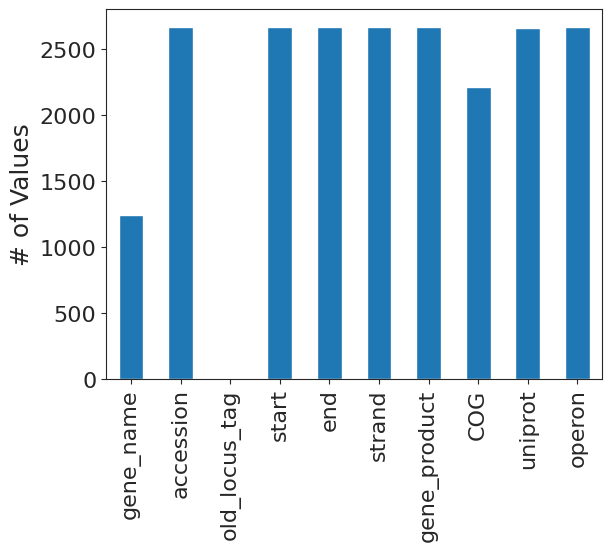

In [261]:
fig,ax = plt.subplots()
DF_annot.count().plot(kind='bar',ax=ax)
ax.set_ylabel('# of Values',fontsize=18)
ax.tick_params(labelsize=16)

## Fill missing values

Some organisms are missing gene names, so these will be filled with locus tag gene names.

In [262]:
# Fill in missing gene names with locus tag names
DF_annot['tmp_name'] = DF_annot.copy().index.tolist()
DF_annot.gene_name.fillna(DF_annot.tmp_name,inplace=True)
DF_annot.drop('tmp_name',axis=1,inplace=True)

 COG letters will also be converted to the full name.

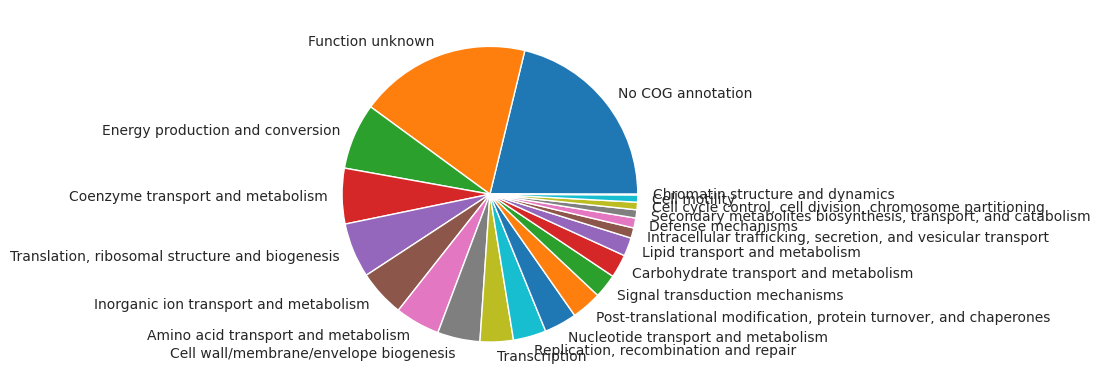

In [264]:
# Fill missing COGs with X
DF_annot['COG'].fillna('X',inplace=True)
DF_annot['COG'] = DF_annot['COG'].str.replace('-','X')


# Change single letter COG annotation to full description
DF_annot['COG'] = DF_annot.COG.apply(cog2str)

counts = DF_annot.COG.value_counts()
plt.pie(counts.values,labels=counts.index);

Uncomment the following line to save the gene annotation dataset

In [265]:
DF_annot.to_csv(os.path.join('..','data','processed_data','gene_info.csv'))

## GO Annotations

To start, download the GO Annotations for your organism from AmiGO 2

1. Go to [AmiGO 2](http://amigo.geneontology.org/amigo/search/annotation)
1. Filter for your organism
1. Click ``CustomDL``
1. Drag ``GO class (direct)`` to the end of your Selected Fields
1. Enter the location of your GO annotation file below and run the following code block

In [282]:
go_file1 = os.path.join('..','data','external','GO_annotations.txt')
go_file2 = os.path.join('..','data','external','3_go_annotation.txt')

In [283]:
DF_GO_1 = pd.read_csv(go_file1,sep='\t',header=None,usecols=[1,3])
DF_GO_1.columns = ['gene_name','gene_ontology']

In [284]:
DF_GO_2 = pd.read_csv(go_file,sep='\t',header=None,usecols=[3,18])
DF_GO_2.columns = ['gene_name','gene_ontology']

In [285]:
DF_GO = pd.concat([DF_GO_1, DF_GO_2], axis=0)
DF_GO

gene_name                        gene_ontology
0               cbbL                          carboxysome
1                ago            DNA endonuclease activity
2               rbcX                cytoplasm|carboxysome
3               labA                     circadian rhythm
4                PSK  ATP binding|D-ribulokinase activity
..               ...                                  ...
129             srpA  hydrogen peroxide metabolic process
130             srpA          oxidation-reduction process
131  Synpcc7942_2061                      protein binding
132  Synpcc7942_2061                      protein binding
133  Synpcc7942_2061                      protein binding

[169 rows x 2 columns]

Convert the gene names to gene locus tags, and drop gene names that cannot be converted

In [295]:
name2num = {v:k for k,v in DF_annot.gene_name.to_dict().items()}

In [296]:
DF_GO['gene_id'] = [name2num[x] if x in name2num.keys() else None for x in DF_GO.gene_name]

In [297]:
DF_GO.head()

gene_name                        gene_ontology          gene_id
0      cbbL                          carboxysome  Synpcc7942_1426
1       ago            DNA endonuclease activity             None
2      rbcX                cytoplasm|carboxysome  Synpcc7942_1535
3      labA                     circadian rhythm  Synpcc7942_1891
4       PSK  ATP binding|D-ribulokinase activity             None

In [323]:
DF_GO.loc[DF_GO['gene_name'] == 'ago', 'gene_id'] = 'Synpcc7942_1534'
DF_GO.loc[DF_GO['gene_name'] == 'PSK', 'gene_id'] = 'Synpcc7942_2462'
DF_GO.loc[DF_GO['gene_name'] == 'enc', 'gene_id'] = 'Synpcc7942_B2662'
DF_GO.loc[DF_GO['gene_name'] == 'ccmK', 'gene_id'] = 'Synpcc7942_1421'
DF_GO.loc[DF_GO['gene_name'] == 'icfA', 'gene_id'] = 'Synpcc7942_1447'
DF_GO.loc[DF_GO['gene_name'] == 'cyd', 'gene_id'] = 'Synpcc7942_B2661'
DF_GO.loc[DF_GO['gene_name'] == 'Synpcc7942_2061', 'gene_id'] = 'Synpcc7942_2061'
DF_GO.loc[DF_GO['gene_name'] == 'Synpcc7942_1424', 'gene_id'] = 'Synpcc7942_1424'
DF_GO.loc[DF_GO['gene_name'] == 'Synpcc7942_0285', 'gene_id'] = 'Synpcc7942_0285'
DF_GO.loc[DF_GO['gene_name'] == 'Synpcc7942_0520', 'gene_id'] = 'Synpcc7942_0520'
DF_GO.loc[DF_GO['gene_name'] == 'Synpcc7942_1427', 'gene_id'] = 'Synpcc7942_1427'
DF_GO.loc[DF_GO['gene_name'] == 'Synpcc7942_0284', 'gene_id'] = 'Synpcc7942_0284'

In [325]:
DF_GO.head()

gene_name                        gene_ontology          gene_id
0      cbbL                          carboxysome  Synpcc7942_1426
1       ago            DNA endonuclease activity  Synpcc7942_1534
2      rbcX                cytoplasm|carboxysome  Synpcc7942_1535
3      labA                     circadian rhythm  Synpcc7942_1891
4       PSK  ATP binding|D-ribulokinase activity  Synpcc7942_2462

Now we remove null entries

In [326]:
DF_GO = DF_GO[DF_GO.gene_id.notnull()]

In [327]:
DF_GO.head()

gene_name                        gene_ontology          gene_id
0      cbbL                          carboxysome  Synpcc7942_1426
1       ago            DNA endonuclease activity  Synpcc7942_1534
2      rbcX                cytoplasm|carboxysome  Synpcc7942_1535
3      labA                     circadian rhythm  Synpcc7942_1891
4       PSK  ATP binding|D-ribulokinase activity  Synpcc7942_2462

Uncomment the line below to save the annotations

In [328]:
DF_GO[['gene_id','gene_name','gene_ontology']].to_csv(os.path.join('..','data','external','GO_annotations_curated.csv'))